### Student Information
Name: 薛惠中 hsueh hui chung

Student ID: 108061516

GitHub ID: hsuehfc713

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

### 1.The  Data and 2.Data Prepration 

In [1]:
### Begin Assignment Here
import pandas as pd #引入Pandas模組 as pd
import matplotlib.pyplot as plt
#pd.set_option("display.max_rows",50)
pd.options.display.max_rows = 50
delimiter="\t"
df_01 = pd.read_csv(r'C:\Users\hsueh\Desktop\DMLab1\sentiment_labelled_sentences\amazon_cells_labelled.txt',header=None,delimiter="\t")
df_02 = pd.read_csv(r'C:\Users\hsueh\Desktop\DMLab1\sentiment_labelled_sentences\imdb_labelled.txt',header=None,delimiter="\t")
df_03 = pd.read_csv(r'C:\Users\hsueh\Desktop\DMLab1\sentiment_labelled_sentences\yelp_labelled.txt',header=None,delimiter="\t")
X = pd.concat([df_01,df_02,df_03],ignore_index=True)
X.columns=["text","score"]
X

text  score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2743  I think food should have flavor and texture an...      0
2744                           Appetite instantly gone.      0
2745  Overall I was not impressed and would not go b...      0
2746  The whole experience was underwhelming, and I ...      0
2747  Then, as if I hadn't wasted enough of my life ...      0

[2748 rows x 2 columns]

### 3.Data Transformation

In [2]:
len(X)

2748

In [3]:
X[0:2]

text  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1

In [4]:
for t in X["text"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [5]:
X[-10:]

text  score
2738  The refried beans that came with my meal were ...      0
2739         Spend your money and time some place else.      0
2740  A lady at the table next to us found a live gr...      0
2741            the presentation of the food was awful.      0
2742           I can't tell you how disappointed I was.      0
2743  I think food should have flavor and texture an...      0
2744                           Appetite instantly gone.      0
2745  Overall I was not impressed and would not go b...      0
2746  The whole experience was underwhelming, and I ...      0
2747  Then, as if I hadn't wasted enough of my life ...      0

In [6]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

text  score
0   So there is no way for me to plug it in here i...      0
10                    And the sound quality is great.      1
20  I went on Motorola's website and followed all ...      0
30  This is a simple little phone to use, but the ...      0
40  It has a great camera thats 2MP, and the pics ...      1
50  Not loud enough and doesn't turn on like it sh...      0
60  Essentially you can forget Microsoft's tech su...      0
70                                  Mic Doesn't work.      0
80      I wear it everyday and it holds up very well.      1
90  For a product that costs as much as this one d...      0

In [7]:
# using loc (by label)
X.loc[::10, 'text'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: text, dtype: object

In [8]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

text  score
0   So there is no way for me to plug it in here i...      0
10                    And the sound quality is great.      1
20  I went on Motorola's website and followed all ...      0
30  This is a simple little phone to use, but the ...      0
40  It has a great camera thats 2MP, and the pics ...      1
50  Not loud enough and doesn't turn on like it sh...      0
60  Essentially you can forget Microsoft's tech su...      0
70                                  Mic Doesn't work.      0
80      I wear it everyday and it holds up very well.      1
90  For a product that costs as much as this one d...      0

### EX2

In [9]:
#Answer here
X.query('score ==0')

text  score
0     So there is no way for me to plug it in here i...      0
3     Tied to charger for conversations lasting more...      0
5     I have to jiggle the plug to get it to line up...      0
6     If you have several dozen or several hundred c...      0
8                   Needless to say, I wasted my money.      0
...                                                 ...    ...
2743  I think food should have flavor and texture an...      0
2744                           Appetite instantly gone.      0
2745  Overall I was not impressed and would not go b...      0
2746  The whole experience was underwhelming, and I ...      0
2747  Then, as if I hadn't wasted enough of my life ...      0

[1362 rows x 2 columns]

### EX3

In [10]:
X.loc[lambda f:f.score == 1].iloc[::10,:][0:5]

text  score
1                         Good case, Excellent value.      1
21  I bought this to use with my Kindle Fire and a...      1
44                       Excellent bluetooth headset.      1
61  I really recommend this faceplates since it lo...      1
78  I love this phone , It is very handy and has a...      1

### 4. Data Mining using Pandas

In [11]:
X.isnull()

text  score
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
...     ...    ...
2743  False  False
2744  False  False
2745  False  False
2746  False  False
2747  False  False

[2748 rows x 2 columns]

In [12]:
import sys
sys.path.append(r'C:\Users\hsueh\Desktop\DMLab1\DM2020-Lab1-Master')
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text     (The amoung of missing records is: , 0)
score    (The amoung of missing records is: , 0)
dtype: object

### EX4

In [13]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [14]:
dummy_series = pd.Series(["dummy_record"], index=["text"])

In [15]:
dummy_series

text    dummy_record
dtype: object

In [16]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [17]:
# check if the records was commited into result
len(result_with_series)

2749

In [18]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text     (The amoung of missing records is: , 0)
score    (The amoung of missing records is: , 1)
dtype: object

In [19]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',            
              }]

In [20]:
X = X.append(dummy_dict, ignore_index=True)

In [21]:
len(X)

2749

In [22]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text     (The amoung of missing records is: , 0)
score    (The amoung of missing records is: , 1)
dtype: object

In [23]:
X.dropna(inplace=True)

In [24]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text     (The amoung of missing records is: , 0)
score    (The amoung of missing records is: , 0)
dtype: object

In [25]:
len(X)

2748

### EX5

Same answer with the first part.

### 4.2 Dealing with Duplicate Data

In [26]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [27]:
sum(X.duplicated())

17

In [28]:
sum(X.duplicated('text'))

17

In [29]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'score': 1, 
                        },
                        {
                             'text': 'dummy record',
                             'score': 1,
                        }]

In [30]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [31]:
len(X)

2750

In [32]:
sum(X.duplicated('text'))

18

In [33]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [34]:
len(X)

2714

### 5. Data Preprocessing

### 5.1 Sampling

In [35]:
X_sample = X.sample(n=1000) #random state

In [36]:
len(X_sample)

1000

In [37]:
X_sample[0:4]

text  score
872   I was very pleased to see that I could replace...    1.0
2583  I paid the bill but did not tip because I felt...    0.0
1722  If you haven't choked in your own vomit by the...    0.0
2014             The service was not up to par, either.    0.0

### Ex6

In [38]:
# The index is no longer in order
X_sample[0:10]
# the first 10 index is no longer 0 to 9

text  score
872   I was very pleased to see that I could replace...    1.0
2583  I paid the bill but did not tip because I felt...    0.0
1722  If you haven't choked in your own vomit by the...    0.0
2014             The service was not up to par, either.    0.0
565                               Disapointing Results.    0.0
705   I love this cable - it allows me to connect an...    1.0
474                           The delivery was on time.    1.0
2611                I love their fries and their beans.    1.0
2136                                This is a disgrace.    0.0
2522       The flair bartenders are absolutely amazing!    1.0

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
score=[0,1]

1.0    1366
0.0    1348
Name: score, dtype: int64


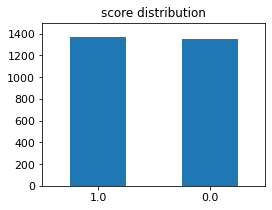

In [41]:
print(X.score.value_counts())

# plot barchart for X_sample
X.score.value_counts().plot(kind = 'bar',
                                    title = 'score distribution',
                                    ylim = [0, 1500],        
                                    rot = 0, fontsize = 11, figsize = (4,3))

0.0    503
1.0    497
Name: score, dtype: int64


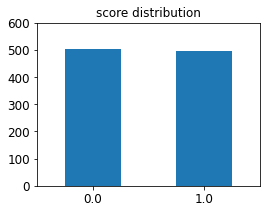

In [42]:
print(X_sample.score.value_counts())

# plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'score distribution',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (4,3))

### Ex7

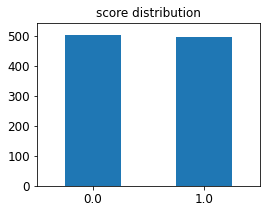

In [43]:
upper = X_sample.score.value_counts().max() + 40
# plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'score distribution',
                                           ylim = [0, upper], 
                                           rot = 0, fontsize = 12, figsize = (4,3))

### Ex8

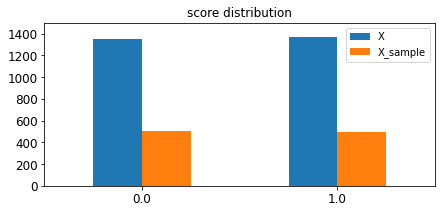

In [44]:
combine = pd.concat([X.score.value_counts(),X_sample.score.value_counts()], axis=1, keys=['X','X_sample'])
combine.plot(kind = 'bar',title = 'score distribution',ylim = [0, 1500],rot = 0, fontsize = 12, figsize = (7,3))

### 5.2 Feature Creation

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hsueh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [47]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [48]:
X[0:4]

text  score  \
0  So there is no way for me to plug it in here i...    0.0   
1                        Good case, Excellent value.    1.0   
2                             Great for the jawbone.    1.0   
3  Tied to charger for conversations lasting more...    0.0   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [49]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
print(X_counts[:2])

print(count_vect.get_feature_names()[4160:4162])

  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1
  (1, 1992)	1
  (1, 712)	1
  (1, 1602)	1
  (1, 4859)	1
['soap', 'sobering']


In [51]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

### Ex9

In [52]:
# Answer here
analyze(" ".join(list(X[:1].text)))
#No punctuation marks and capital words

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [53]:
# We can check the shape of this matrix by:
X_counts.shape
#Document 2257/ words 35788

(2714, 5153)

In [54]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[1000:1010]

['contrast',
 'contributing',
 'contributory',
 'contrived',
 'control',
 'controls',
 'controversy',
 'contstruct',
 'convenient',
 'convention']

In [55]:
X[0:5]

text  score  \
0  So there is no way for me to plug it in here i...    0.0   
1                        Good case, Excellent value.    1.0   
2                             Great for the jawbone.    1.0   
3  Tied to charger for conversations lasting more...    0.0   
4                                  The mic is great.    1.0   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...  
4                           [The, mic, is, great, .]

In [56]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### Ex10

In [57]:
# Answer here
import numpy as np
pos = np.where((X_counts[3,0:100]==1).toarray()[0] == True)[0][0]
count_vect.get_feature_names()[pos]

'45'

In [58]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [61]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [62]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [63]:
plot_z = X_counts[0:20, 0:20].toarray()

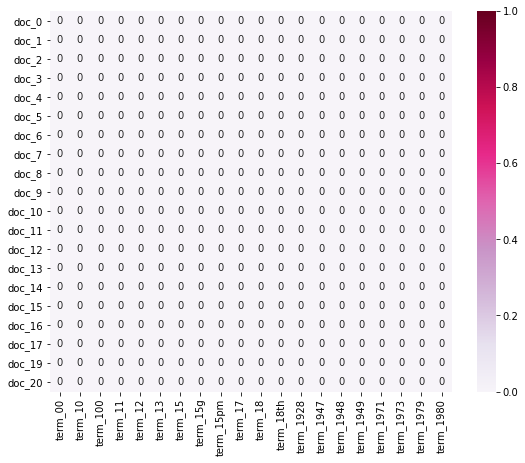

In [64]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Ex11

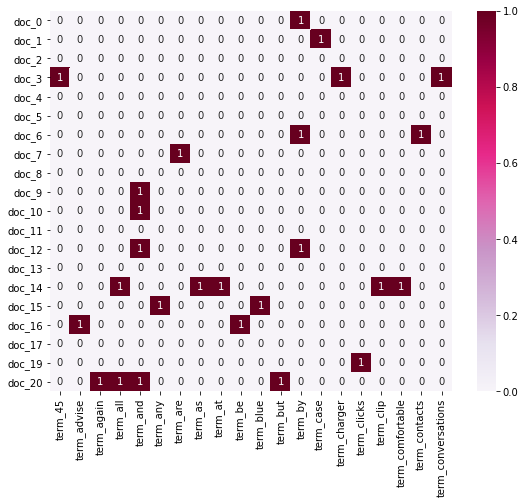

In [65]:
# Answer here
# drop the term that first 20 document has 0 value
index = []
for i in range(X_counts[0:20, :].shape[1]):
    if (X_counts[0:20,i].toarray()==1).sum()>0:        
        index.append(i)
    if len(index)==20:
        break
plot_z = X_counts[0:20, index].toarray()
plot_x = ["term_"+str(count_vect.get_feature_names()[i]) for i in index]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [66]:
from sklearn.decomposition import PCA

In [67]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [68]:
X_reduced.shape

(2714, 2)

In [69]:
score

[0, 1]

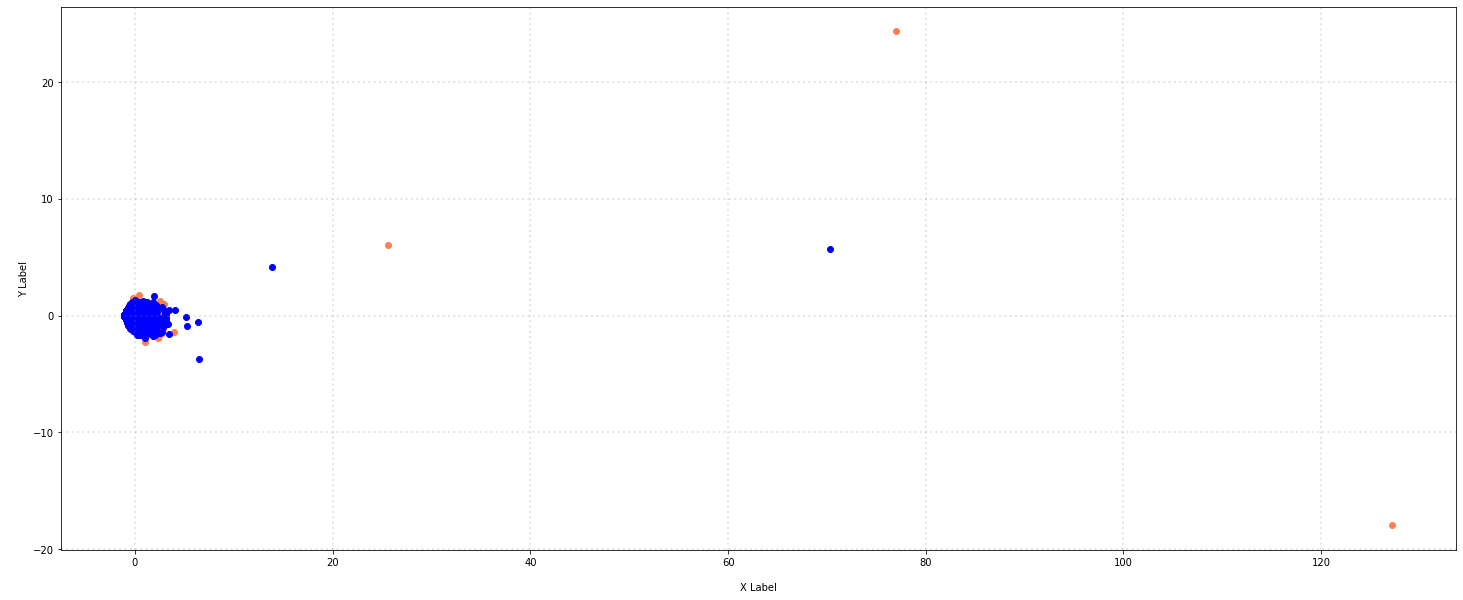

In [70]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, score):
    xs = X_reduced[X['score'] == category].T[0]
    ys = X_reduced[X['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### Ex12

In [71]:
# Answer here
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())

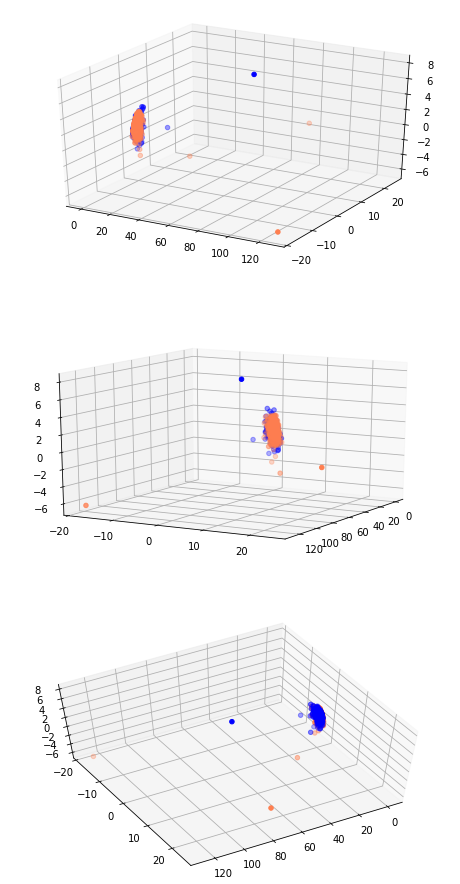

In [72]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,16))
ax1= fig.add_subplot(311,projection='3d')
ax2= fig.add_subplot(312,projection='3d')
ax2.view_init(15, 30)
ax3= fig.add_subplot(313,projection='3d')
ax3.view_init(60, 60)

for c, category in zip(col, score):
    xs = X_reduced3[X['score'] == category].T[0]
    ys = X_reduced3[X['score'] == category].T[1]
    zs = X_reduced3[X['score'] == category].T[2]
   
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

plt.show()
# In 2D graph, blue and orange dots seems gather together. But in 3D graph (especially first plot), we can observe that
# orange actually different from blue dots. Also, black group are also seperated from blue and orange dots which is also
# cannot be observed in 2D plot

### 5.5 Atrribute Transformation / Aggregation

In [73]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [74]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [75]:
term_frequencies[0]

1

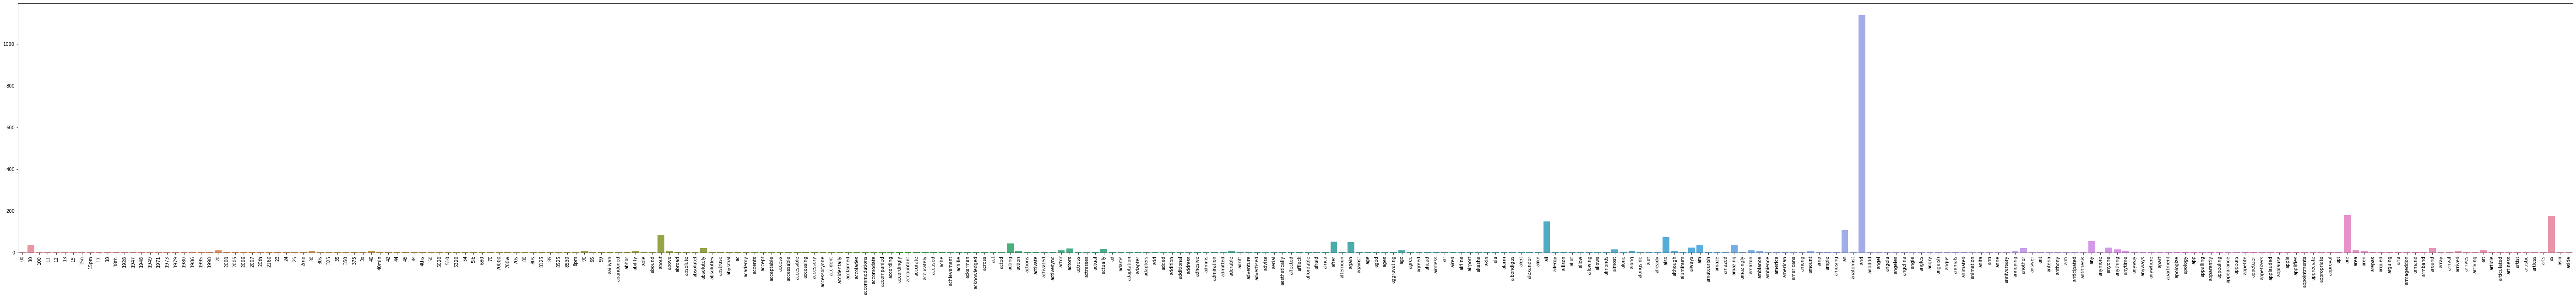

In [76]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### Ex13

In [77]:
# Answer here
import plotly.graph_objects as gra

terms = ['term_' + w for w in count_vect.get_feature_names()[0:200]]
fig = gra.Figure()
fig.add_trace(gra.Bar(x=terms,
                     y=term_frequencies.tolist()[0:200],
                    ))
fig.update_layout(xaxis_tickangle=-90)
fig.show()

### Ex14

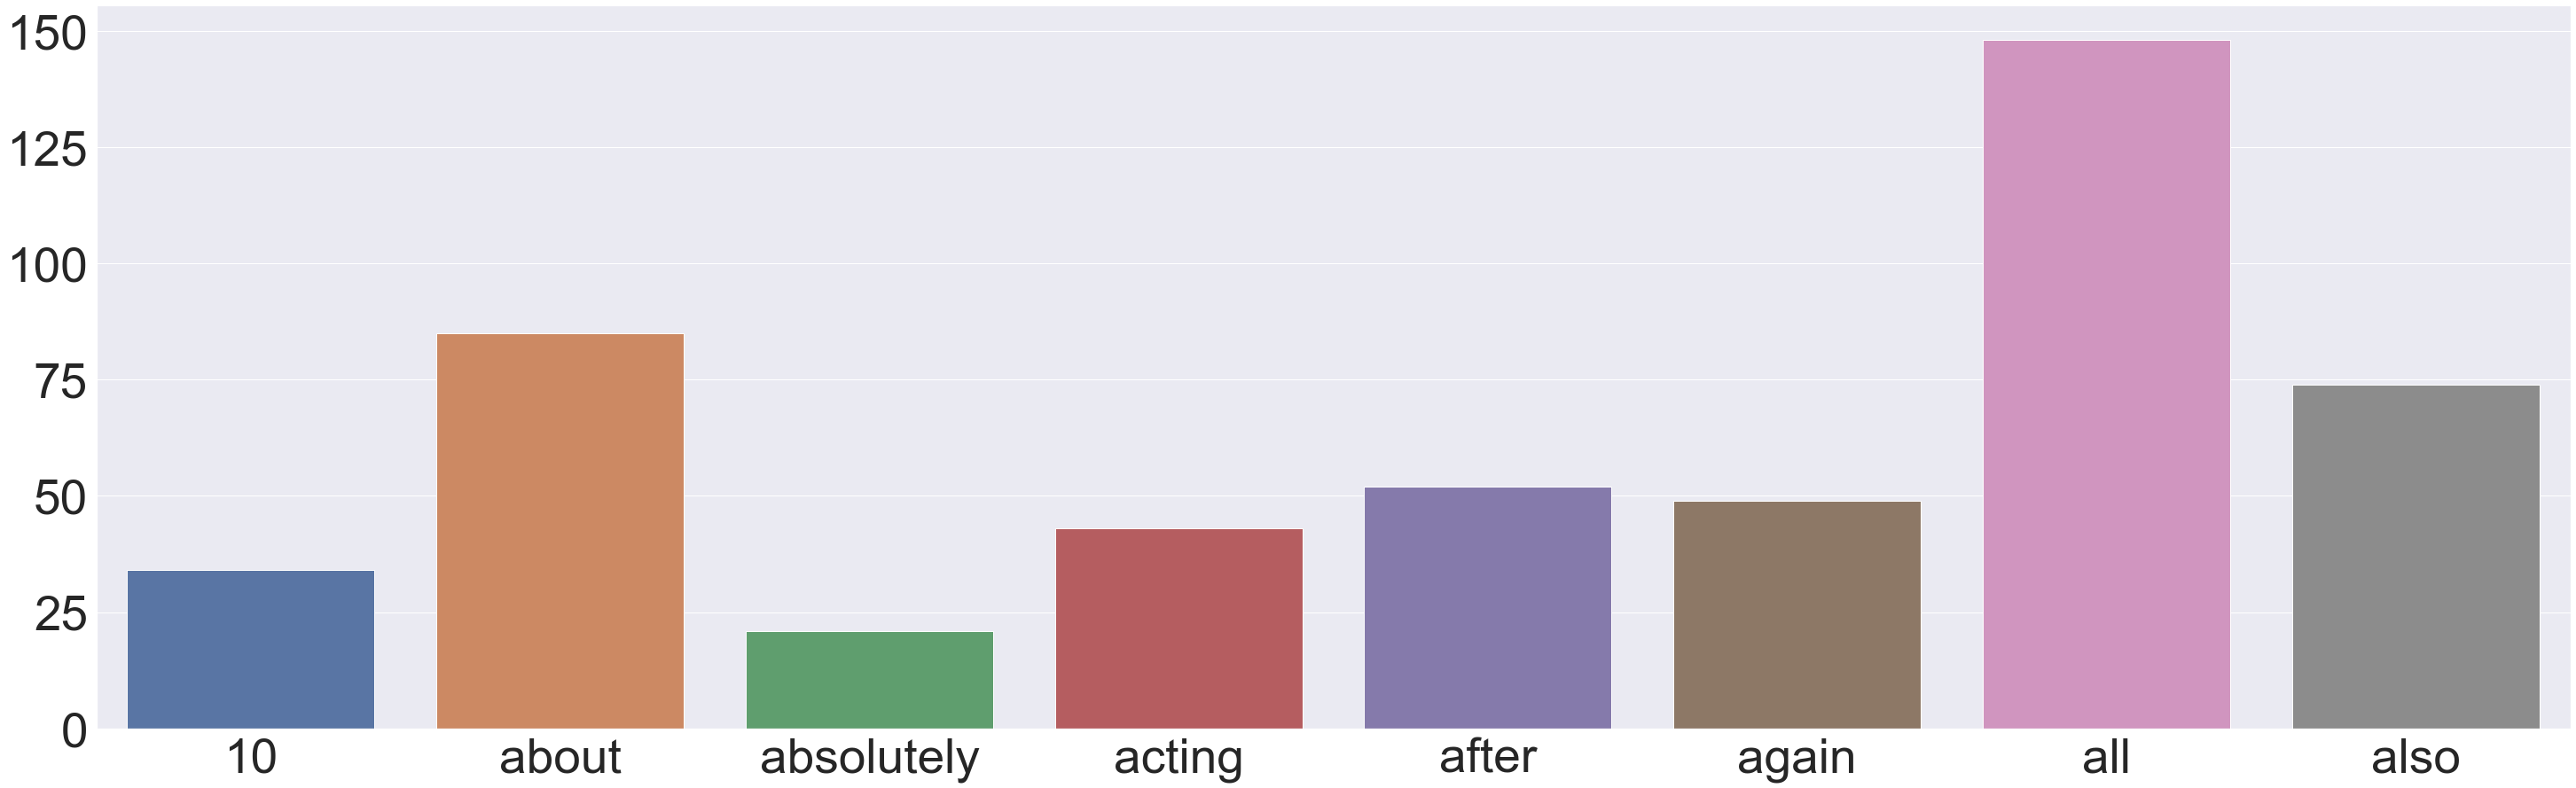

In [78]:
# Answer here
terms = np.array(count_vect.get_feature_names())[term_frequencies>20][0:8]
num = term_frequencies[term_frequencies>20][0:8]
        
sns.set(font_scale=5)
plt.subplots(figsize=(50, 15))
g = sns.barplot(x=terms, y=num)

### Ex15

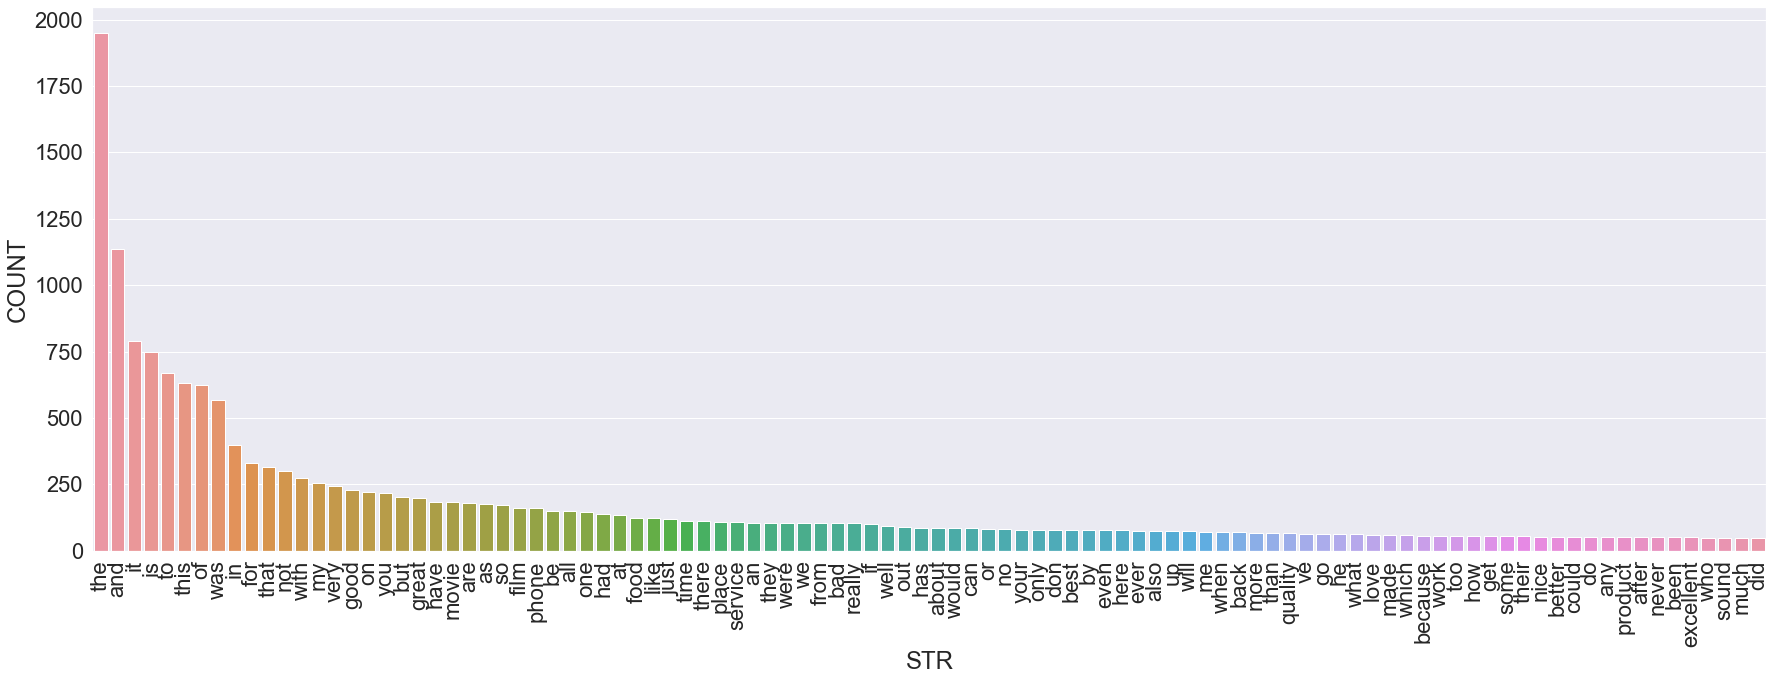

In [79]:
# Answer here
d = {'STR': count_vect.get_feature_names(), 'COUNT': term_frequencies}
DATA = pd.DataFrame(data=d)
DATA = DATA.sort_values(by='COUNT',ascending=False)

sns.set(font_scale=2)
plt.subplots(figsize=(30, 10))
g = sns.barplot(x=DATA.STR[:100], 
            y=DATA.COUNT[:100])
g.set_xticklabels(DATA.STR[:100], rotation = 90);

In [80]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

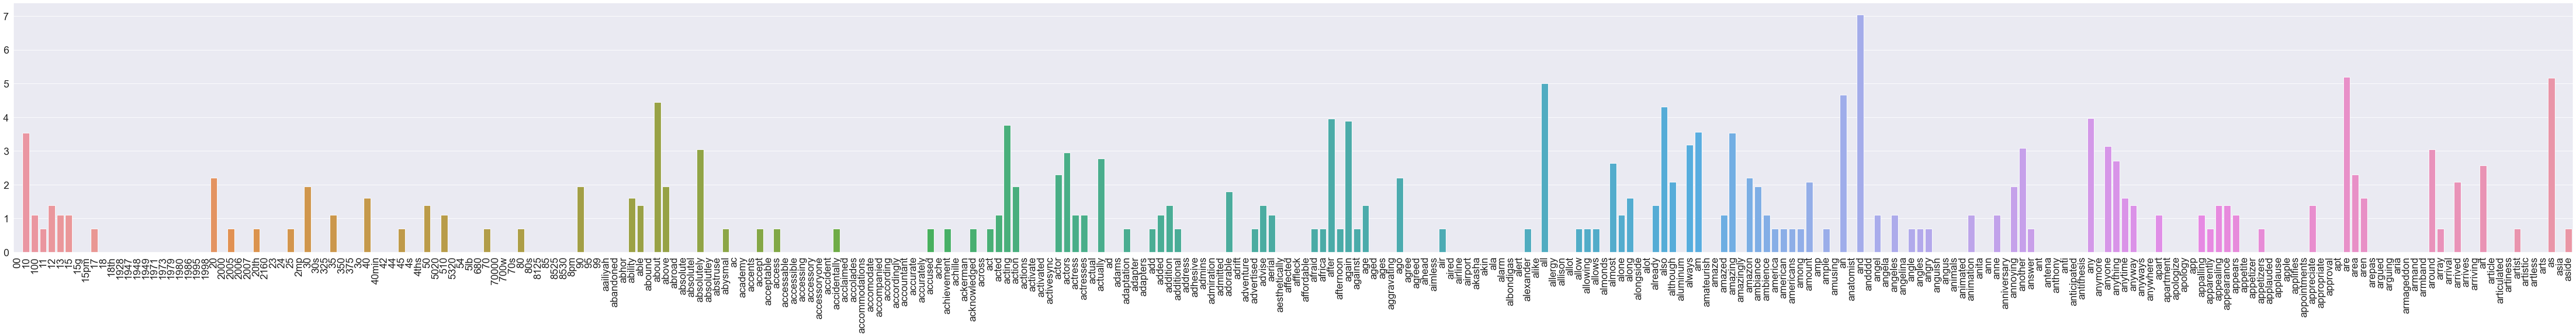

In [81]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### 5.6 Discretization and Binarization

In [82]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [83]:
mlb = preprocessing.LabelBinarizer()

In [84]:
mlb.fit(X.score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [85]:
mlb.classes_

array([0., 1.])

In [86]:
X['bin_score'] = mlb.transform(X['score']).tolist()

In [87]:
X[0:9]

text  score  \
0  So there is no way for me to plug it in here i...    0.0   
1                        Good case, Excellent value.    1.0   
2                             Great for the jawbone.    1.0   
3  Tied to charger for conversations lasting more...    0.0   
4                                  The mic is great.    1.0   
5  I have to jiggle the plug to get it to line up...    0.0   
6  If you have several dozen or several hundred c...    0.0   
7        If you are Razr owner...you must have this!    1.0   
8                Needless to say, I wasted my money.    0.0   

                                            unigrams bin_score  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  
1               [Good, case, ,, Excellent, value, .]       [1]  
2                      [Great, for, the, jawbone, .]       [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  
4                           [The, mic, is, great, .]       [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...       [0]  
6  [If, you, have, several, dozen, or, several, h...       [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...       [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]       [0]

### Ex16

Don't have samething like Score_name, so i jump this exercice.

### 6. Data Exploration

In [88]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [89]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [90]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [91]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


### Third part of HW1

(1) Generate meaningful new data visualizations.

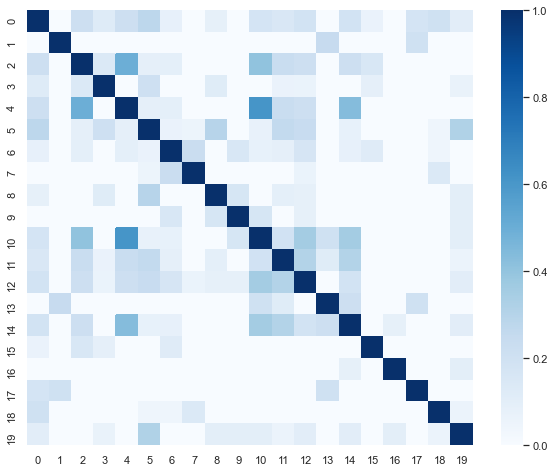

In [92]:
#I use heatmap to show the cosine similarity of first 20 datas.
#You can find out which datas are more similar to each other clearly by this picture.

cos_sim_count=[]
data_num = 20

for i in range(data_num):
    docu_to_trans_A = []
    docu_to_trans_A.append(X.iloc[i]['text'])
    docu_vector_count_A = count_vect.transform(docu_to_trans_A)
    for j in range(data_num):
        docu_to_trans_B = []
        docu_to_trans_B.append(X.iloc[j]['text'])
        docu_vector_count_B = count_vect.transform(docu_to_trans_B)        
        cos_sim_count.append(cosine_similarity(docu_vector_count_A,docu_vector_count_B, dense_output=True))

data_cos_sim = [[0]*data_num for i in range(data_num)]
for w in range(data_num):
    for z in range(data_num):
        data_cos_sim[w][z]=cos_sim_count[w*data_num+z][0][0]

plt.figure(figsize = (10,8))
sns.set(font_scale=1)
ax = sns.heatmap(data_cos_sim, cmap="Blues")

(2) Generate TF-IDF features from the tokens of each text.

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
TFIDF = vectorizer.fit_transform(X['text'])
print(TFIDF[:3])

  (0, 1012)	0.39760280994209996
  (0, 646)	0.2254918241562321
  (0, 1981)	0.2305922255513009
  (0, 4791)	0.33049363105012364
  (0, 4833)	0.2734360744302475
  (0, 4529)	0.08793358771104859
  (0, 2157)	0.2208779498694263
  (0, 2313)	0.30056484014393725
  (0, 2431)	0.1207674337223673
  (0, 3385)	0.30699066387623564
  (0, 4607)	0.12767646792530557
  (0, 2808)	0.22834023626327007
  (0, 1828)	0.15635119868019803
  (0, 4985)	0.24796841281626697
  (0, 3042)	0.22346037757217438
  (0, 2426)	0.12238391244831032
  (0, 4543)	0.2102016861591622
  (0, 4159)	0.1863893949948429
  (1, 4859)	0.6337823109404023
  (1, 1602)	0.47370582524379545
  (1, 712)	0.511048226653959
  (1, 1992)	0.3357863658682137
  (2, 2448)	0.8201554940815293
  (2, 2022)	0.4050025452976369
  (2, 4529)	0.19810346820878585
  (2, 1828)	0.3522398610520519


(3) Naive Bayes classifier

In [94]:
# TF-IDF features

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(TFIDF, X['score'], test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8100147275405007

In [95]:
# Word frequency features

X_train, X_test, Y_train, Y_test = train_test_split(X_counts, X['score'], test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8070692194403535

Comment on the differences.
The accuracy of these two classifiers are very close, but we can find out that using TF-IDF features gets a little bit better performance in averge.
TF-IDF method combines term frequency and inverse document frequency. Compare to the word frequency method, TF-IDF considers more information inside, so I think that's the reason why it can have better performance.

### Fourth part of HW1

In the data processing methods above, we didn't remove any words from the data. However there are always some meaningless words in sentences, like 'a', 'the'. So we can use the concept of 'stopwords' to remove the meaningless words and make the data simple for any implement.

In [96]:
X.head()

text  score  \
0  So there is no way for me to plug it in here i...    0.0   
1                        Good case, Excellent value.    1.0   
2                             Great for the jawbone.    1.0   
3  Tied to charger for conversations lasting more...    0.0   
4                                  The mic is great.    1.0   

                                            unigrams bin_score  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  
1               [Good, case, ,, Excellent, value, .]       [1]  
2                      [Great, for, the, jawbone, .]       [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  
4                           [The, mic, is, great, .]       [1]

In [97]:
import nltk
nltk.download('stopwords')
nltk_stopwords = nltk.corpus.stopwords.words('english')
print('NLTK has {} stop words'.format(len(nltk_stopwords)))
print('The first five stop words are {}'.format(list(nltk_stopwords)[:5]))

NLTK has 179 stop words
The first five stop words are ['i', 'me', 'my', 'myself', 'we']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hsueh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
from nltk import word_tokenize

def rmsw_function(text, stopword_list):
    return ' '.join([word for word in word_tokenize(text) if word not in stopword_list])

X['nltk_rmsw_text'] = X['text'].apply(lambda x: rmsw_function(x, set(nltk_stopwords)))

In [99]:
X.head()

text  score  \
0  So there is no way for me to plug it in here i...    0.0   
1                        Good case, Excellent value.    1.0   
2                             Great for the jawbone.    1.0   
3  Tied to charger for conversations lasting more...    0.0   
4                                  The mic is great.    1.0   

                                            unigrams bin_score  \
0  [So, there, is, no, way, for, me, to, plug, it...       [0]   
1               [Good, case, ,, Excellent, value, .]       [1]   
2                      [Great, for, the, jawbone, .]       [1]   
3  [Tied, to, charger, for, conversations, lastin...       [0]   
4                           [The, mic, is, great, .]       [1]   

                                      nltk_rmsw_text  
0             So way plug US unless I go converter .  
1                      Good case , Excellent value .  
2                                    Great jawbone .  
3  Tied charger conversations lasting 45 minutes....  
4                                    The mic great .

In [100]:
TFIDF_rmsw = vectorizer.fit_transform(X['nltk_rmsw_text'])
print(TFIDF_rmsw[:3])

  (0, 1006)	0.503783284429244
  (0, 1969)	0.29217225293000365
  (0, 4762)	0.41875249060142167
  (0, 4803)	0.34645762105647393
  (0, 3360)	0.38897301797038514
  (0, 4954)	0.314188779152434
  (0, 4133)	0.3397596911350693
  (1, 4829)	0.6337823109404023
  (1, 1592)	0.47370582524379545
  (1, 706)	0.511048226653959
  (1, 1980)	0.3357863658682137
  (2, 2427)	0.8966355639116417
  (2, 2009)	0.4427693141228877


In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(TFIDF_rmsw, X['score'], test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8114874815905744

The accuracy is between 0.76-0.83, actually it doesn't have better performance than the original data. I think the reason is that the datas are already very simple, only one sentence in each document. So we can't get better accuracy after removing stopwords. However, when the texts in the document become more longer, I think this method will help a lot.